<a href="https://colab.research.google.com/github/artiagra/Board-Infinity/blob/master/Python1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [0]:
import io
import pandas as pd
train = pd.read_csv(io.BytesIO(uploaded['tips.csv']))

In [3]:
train.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [4]:
train['tip'].mean()

2.9982786885245902

In [5]:
train['tip'].median()

2.9

mean and median are not different

In [6]:
train['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

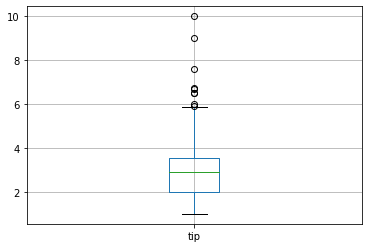

In [7]:
train.boxplot(column=['tip'])

yes there are outliers in tips

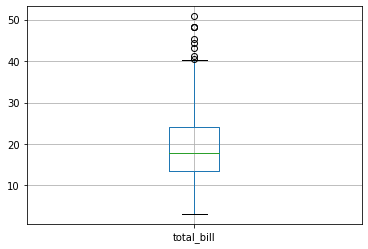

In [8]:
train.boxplot(column=['total_bill'])

yes there are outliers in total_bill

In [9]:
train['sex'].value_counts(normalize=True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

the percentage of female is 35.65%

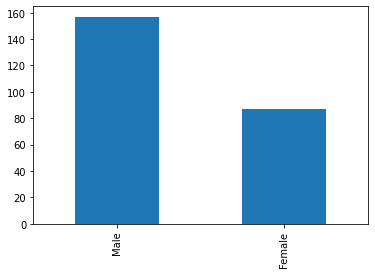

In [10]:
train['sex'].value_counts().plot(kind='bar')

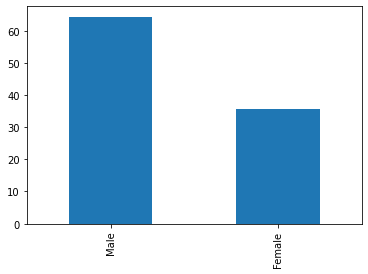

In [20]:
s = (train['sex'].value_counts(normalize=True)) * 100
s.plot(kind='bar')

In [22]:
train.groupby(['sex']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


yes the average tip differ by gender

male tip more than female

In [23]:
train.groupby(['time']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


yes the average tip differ by time of day

In [24]:
train.groupby(['size']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1.0,4.0,1.437500,0.506516,1.00,1.0000,1.415,1.8525,1.92
2.0,156.0,2.582308,0.985501,1.00,2.0000,2.500,3.1450,5.85
3.0,38.0,3.393158,1.557344,1.36,2.3575,3.290,3.6825,10.00
4.0,37.0,4.135405,1.640668,2.00,3.0000,3.760,5.0700,9.00
5.0,5.0,4.028000,1.440111,2.00,3.0000,5.000,5.0000,5.14
6.0,4.0,5.225000,1.053170,4.20,4.8000,5.000,5.4250,6.70


yes the average tip differ by size, it increases with the number of people at the table

In [25]:
train.groupby(['smoker']).describe()['tip']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


yes, smokers tip more than non smokers

In [37]:
train.groupby(['sex','smoker','size']).describe()['tip']

count      mean       std  ...    50%     75%    max
sex    smoker size                             ...                      
Female No     1.0     2.0  1.415000  0.586899  ...  1.415  1.6225   1.83
              2.0    33.0  2.370606  0.739539  ...  2.300  3.0000   4.08
              3.0     9.0  2.918889  1.086456  ...  3.000  3.5000   4.67
              4.0     7.0  4.014286  1.124794  ...  3.750  5.0850   5.20
              5.0     1.0  5.140000       NaN  ...  5.140  5.1400   5.14
              6.0     2.0  4.600000  0.565685  ...  4.600  4.8000   5.00
       Yes    1.0     1.0  1.000000       NaN  ...  1.000  1.0000   1.00
              2.0    25.0  2.736800  1.020297  ...  2.500  3.4800   5.00
              3.0     5.0  3.846000  1.539019  ...  3.500  3.5000   6.50
              4.0     2.0  4.045000  1.350574  ...  4.045  4.5225   5.00
Male   No     2.0    57.0  2.557544  0.981170  ...  2.500  3.1800   5.85
              3.0    17.0  3.148824  1.125299  ...  3.150  3.6000   5.92
              4.0    19.0  4.262632  2.007809  ...  4.000  5.3350   9.00
              5.0     2.0  5.000000  0.000000  ...  5.000  5.0000   5.00
              6.0     2.0  5.850000  1.202082  ...  5.850  6.2750   6.70
       Yes    1.0     1.0  1.920000       NaN  ...  1.920  1.9200   1.92
              2.0    41.0  2.692927  1.135003  ...  2.200  3.1800   5.65
              3.0     7.0  4.272857  2.616516  ...  3.500  4.0000  10.00
              4.0     9.0  3.981111  1.336286  ...  3.760  4.7300   6.50
              5.0     2.0  2.500000  0.707107  ...  2.500  2.7500   3.00

[20 rows x 8 columns]

non smokers male with size 6 tips the most

In [0]:
train['pct_tip'] = train['tip']/train['total_bill']

In [33]:
train.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2.0,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3.0,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3.0,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2.0,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4.0,0.146808


In [35]:
train.groupby(['sex']).describe()['pct_tip']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,0.166491,0.053632,0.056433,0.140416,0.155581,0.194266,0.416667
Male,157.0,0.157651,0.064778,0.035638,0.121389,0.153492,0.186240,0.710345


yes, females slightly tip more than males

In [36]:
train.groupby(['size']).describe()['pct_tip']

,count,mean,std,min,25%,50%,75%,max
size,,,,,,,,
1.0,4.0,0.217292,0.080342,0.137931,0.170779,0.202752,0.249265,0.325733
2.0,156.0,0.165719,0.066848,0.035638,0.135223,0.156104,0.195036,0.710345
3.0,38.0,0.152157,0.045459,0.056433,0.124758,0.159323,0.186135,0.230742
4.0,37.0,0.145949,0.042395,0.077459,0.117750,0.146699,0.169797,0.280535
5.0,5.0,0.141495,0.067733,0.065660,0.106572,0.121389,0.172194,0.241663
6.0,4.0,0.156229,0.042153,0.103799,0.131654,0.162891,0.187466,0.195335


yes pct_tip differs by the size

In [38]:
train.groupby(['sex','smoker','size']).describe()['pct_tip']

count      mean       std  ...       50%       75%       max
sex    smoker size                             ...                              
Female No     1.0     2.0  0.159829  0.030969  ...  0.159829  0.170779  0.181728
              2.0    33.0  0.160152  0.040006  ...  0.150152  0.194922  0.252672
              3.0     9.0  0.154999  0.040628  ...  0.161665  0.181335  0.206246
              4.0     7.0  0.139444  0.013685  ...  0.146808  0.148909  0.150000
              5.0     1.0  0.172194       NaN  ...  0.172194  0.172194  0.172194
              6.0     2.0  0.162891  0.031044  ...  0.162891  0.173867  0.184843
       Yes    1.0     1.0  0.325733       NaN  ...  0.325733  0.325733  0.325733
              2.0    25.0  0.184925  0.068862  ...  0.173913  0.198216  0.416667
              3.0     5.0  0.168718  0.066687  ...  0.192837  0.196114  0.230742
              4.0     2.0  0.109252  0.009518  ...  0.109252  0.112617  0.115982
Male   No     2.0    57.0  0.167800  0.043826  ...  0.163894  0.198157  0.291990
              3.0    17.0  0.146851  0.037300  ...  0.150085  0.160542  0.227747
              4.0    19.0  0.150611  0.031358  ...  0.147059  0.177004  0.192288
              5.0     2.0  0.181526  0.085047  ...  0.181526  0.211594  0.241663
              6.0     2.0  0.149567  0.064726  ...  0.149567  0.172451  0.195335
       Yes    1.0     1.0  0.223776       NaN  ...  0.223776  0.223776  0.223776
              2.0    41.0  0.155596  0.100669  ...  0.142789  0.179673  0.710345
              3.0     7.0  0.149560  0.059493  ...  0.173160  0.194008  0.213789
              4.0     9.0  0.149321  0.072703  ...  0.117750  0.199305  0.280535
              5.0     2.0  0.086116  0.028929  ...  0.086116  0.096344  0.106572

[20 rows x 8 columns]

yes smoker females with least size tips the most

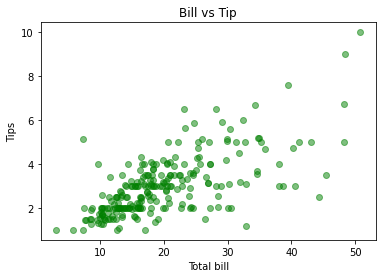

In [39]:
import matplotlib.pyplot as plt

plt.scatter(train['total_bill'], train['tip'], alpha=.5, c='g')
plt.title('Bill vs Tip')
plt.xlabel('Total bill')
plt.ylabel('Tips')

plt.show()

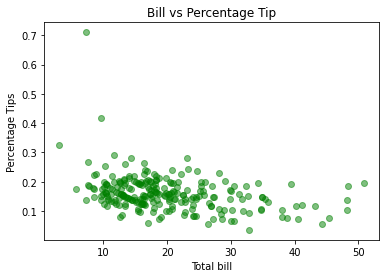

In [40]:
plt.scatter(train['total_bill'], train['pct_tip'], alpha=.5, c='g')
plt.title('Bill vs Percentage Tip')
plt.xlabel('Total bill')
plt.ylabel('Percentage Tips')

plt.show()